## What is pandas good for?

Working with (large) data sets and created automated data processes.

Pandas is extensively used to prepare data in data science (machine learning, data analytics, ...)

**Examples**: 
* **Import and export** data into standard formats (CSV, Excel, Latex, ..).
* Combine with Numpy for **advanced computations** or Matplotlib for **visualisations**.
* Calculate **statistics** and answer questions about the data, like
  * What's the average, median, max, or min of each column?
  * Does column A correlate with column B?
  * What does the distribution of data in column C look like?
* **Clean** up data (e.g. fill out missing information and fix inconsistent formatting) and **merge** multiple data sets into one common dataset.


<img src="data/pressure.png" style="width: 1000px;"/>

In [2]:
import pandas as pd
import pylab as pl

First, a short recap of the video session

The two fundamental data-structures in pandas are Series and DataFrame:

In [5]:
s = pd.Series([1, 2, 3])
s

0    1
1    2
2    3
dtype: int64

In [8]:
s = pd.Series([1, 2, 3], index=["a", "b", "c"])
s

a    1
b    2
c    3
dtype: int64

In [9]:
dic = {"a": 1, "b": 2, "c": 3}
s = pd.Series(dic)
s

a    1
b    2
c    3
dtype: int64

In [10]:
s["a"]

1

In [11]:
dic = {"a": [1, 2], "b": [3, 4], "c": [5, 6]}
s = pd.DataFrame(dic)
s

,a,b,c
0,1,3,5
1,2,4,6


In [12]:
s["a"]

0    1
1    2
Name: a, dtype: int64

In [13]:
s["a"][0]

1

In [16]:
s.columns

Index(['a', 'b', 'c'], dtype='object')

# Reading data from file
Now assume that we have some pressure data obtained from a sensor, as shown below
<img src="data/pressure.png" style="width: 1000px;"/>

In [17]:
df = pd.read_csv("data/pressure.csv")

In [18]:
df

,Unnamed: 0,t,p
0,0,0.000,-1.077684
1,1,0.005,-0.933488
2,2,0.010,-0.956377
3,3,0.015,-0.963243
4,4,0.020,-0.864824
...,...,...,...
5995,5995,29.975,2.296034
5996,5996,29.980,2.312056
5997,5997,29.985,2.488295
5998,5998,29.990,2.570692


In [19]:
t = df["t"]
p = df["p"]

In [20]:
p

0      -1.077684
1      -0.933488
2      -0.956377
3      -0.963243
4      -0.864824
          ...   
5995    2.296034
5996    2.312056
5997    2.488295
5998    2.570692
5999    2.472273
Name: p, Length: 6000, dtype: float64

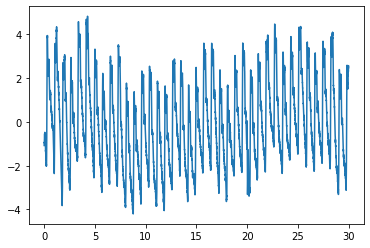

In [21]:
pl.plot(t, p)
pl.show()

This way of extracting data from the DataFrame is useful for futher computations with t and p. For plotting purposes only, the DataFrame has its own plot-function:

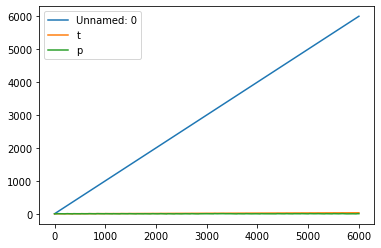

In [22]:
df.plot()
pl.show()

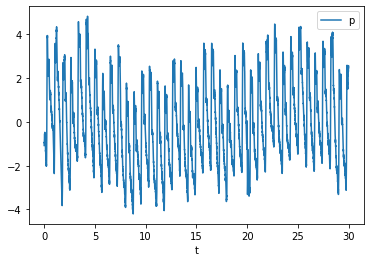

In [23]:
df.plot("t", "p")
pl.show()

# How to write data to csv

In [24]:
t = pl.linspace(0, 2 * pl.pi, 200)
p = pl.sin(2 * pl.pi * t)

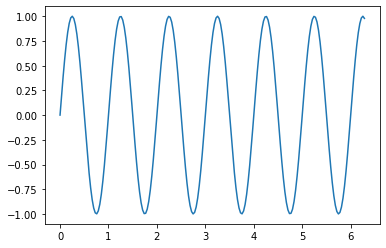

In [25]:
pl.plot(t, p)
pl.show()

In [26]:
data = pl.array([t, p])

When dealing with table data, you should always consider whether to use the .transpose() of a matrix

In [28]:
df = pd.DataFrame(data.transpose(), columns=["t", "p"])

In [29]:
df

,t,p
0,0.000000,0.000000
1,0.031574,0.197085
2,0.063148,0.386439
3,0.094721,0.560635
4,0.126295,0.712838
...,...,...
195,6.156890,0.833697
196,6.188464,0.926180
197,6.220038,0.982332
198,6.251612,0.999949


In [30]:
df.to_csv("pressure_computed.csv")

#### Adding a column to the existing DataFrame:

In [32]:
v = pl.cos(2 * pl.pi * t)
v

array([ 1.        ,  0.98038635,  0.92231478,  0.82806328,  0.70132909,
        0.54708365,  0.37137759,  0.18110338, -0.01627502, -0.213015  ,
       -0.40139897, -0.57403714, -0.72415738, -0.84587087, -0.93440313,
       -0.98628127, -0.99947025, -0.9734527 , -0.90924922, -0.80937835,
       -0.67775774, -0.51955052, -0.34096273, -0.14899989,  0.04880781,
        0.24470092,  0.43099506,  0.60038243,  0.74621842,  0.86278226,
        0.94550148,  0.99113122,  0.99788155,  0.96548768,  0.89522032,
        0.78983588,  0.6534683 ,  0.49146692,  0.31018662,  0.11673853,
       -0.0812889 , -0.27612758, -0.46013452, -0.62609162, -0.76748884,
       -0.87877953, -0.95559807, -0.99493106, -0.99523559, -0.95649971,
       -0.88024292, -0.76945657, -0.62848651, -0.46286261, -0.27908187,
       -0.08435349,  0.11368385,  0.30726168,  0.48878646,  0.65113746,
        0.7879461 ,  0.89384572,  0.96468219,  0.99767677,  0.99153518,
        0.94649833,  0.8643329 ,  0.74826202,  0.60283883,  0.43

In [33]:
df["v"] = v

In [34]:
df

,t,p,v
0,0.000000,0.000000,1.000000
1,0.031574,0.197085,0.980386
2,0.063148,0.386439,0.922315
3,0.094721,0.560635,0.828063
4,0.126295,0.712838,0.701329
...,...,...,...
195,6.156890,0.833697,0.552222
196,6.188464,0.926180,0.377081
197,6.220038,0.982332,0.187149
198,6.251612,0.999949,-0.010125


It is possible to create an empty DataFrame and just add the columns whenever you like:

In [35]:
empty_df = pd.DataFrame()

In [36]:
empty_df["t"] = t
empty_df["p"] = p
empty_df["v"] = v

In [37]:
empty_df

,t,p,v
0,0.000000,0.000000,1.000000
1,0.031574,0.197085,0.980386
2,0.063148,0.386439,0.922315
3,0.094721,0.560635,0.828063
4,0.126295,0.712838,0.701329
...,...,...,...
195,6.156890,0.833697,0.552222
196,6.188464,0.926180,0.377081
197,6.220038,0.982332,0.187149
198,6.251612,0.999949,-0.010125


<AxesSubplot:xlabel='t'>

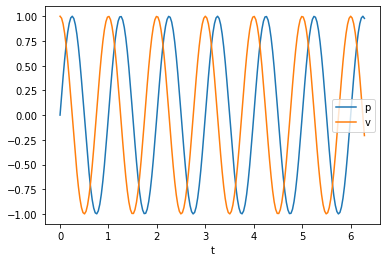

In [38]:
empty_df.plot("t", ["p", "v"])  # pl.plot(t,p,t,v) in matplotlib

**Exercise** 
1. Create uniformly sampled time points between 0 and 30.
2. Generate positional data in the xy-plane given by [0.4*t + cos(t), sin(t)]
3. Create a DataFrame consisting of the three columns t, x and y
4. plot x versus y using first the matplotlib plot function and then the DataFrame plot-method

Velocity-data can be computed by $v_{x_i} = \frac{x_{i+1} - x_i}{t_{i+1} - t_i}$, $v_{y_i} = \frac{y_{i+1} - y_i}{t_{i+1} - t_i}$
5. Compute the velocity data for x and y and add those as columns in the DataFrame



## A real world example. Oslo bysykkel data
We go to https://oslobysykkel.no/apne-data/historisk (you can also get there by "oslo bysykkel data historisk" on google). We download the September data as CSV. 

In [39]:
import pandas as pd
import pylab as pl

trips = pd.read_csv("data/bysykkel/trips-2021.9.1-2021.9.30.csv")

In [42]:
trips

,started_at,ended_at,duration,start_station_id,start_station_name,start_station_description,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_description,end_station_latitude,end_station_longitude
0,2021-09-01 03:00:15.478000+00:00,2021-09-01 03:20:12.685000+00:00,1197,620,Bislettgata,ved Sofies Gate,59.923774,10.734713,735,Oslo Hospital,ved trikkestoppet,59.903213,10.767344
1,2021-09-01 03:03:04.080000+00:00,2021-09-01 03:06:10.732000+00:00,186,422,St. Hanshaugen,langs Waldemar Thranes gate,59.923703,10.740542,499,Bjerregaards gate,ovenfor Fredrikke Qvams gate,59.925488,10.746058
2,2021-09-01 03:16:41.288000+00:00,2021-09-01 03:25:20.740000+00:00,519,424,Birkelunden,langs Seilduksgata,59.925611,10.760926,478,Jernbanetorget,Europarådets plass,59.911901,10.749929
3,2021-09-01 03:21:55.708000+00:00,2021-09-01 03:28:20.138000+00:00,384,446,Bislett Stadion,ved rundkjøringen,59.925471,10.731219,478,Jernbanetorget,Europarådets plass,59.911901,10.749929
4,2021-09-01 03:26:16.090000+00:00,2021-09-01 03:30:30.133000+00:00,254,514,Sofienberggata,ved Sars gate,59.921206,10.769989,542,Grünerhagen Nord,ved Sofienberggata,59.922426,10.755427
...,...,...,...,...,...,...,...,...,...,...,...,...,...
190000,2021-09-30 22:56:22.073000+00:00,2021-09-30 23:11:50.892000+00:00,928,415,Sinsenveien,ved Kongehellegata,59.929542,10.781053,537,St. Olavs gate,ved Pilestredet,59.917968,10.738629
190001,2021-09-30 22:57:17.478000+00:00,2021-09-30 23:01:52.188000+00:00,274,460,Botanisk Hage sør,langs Jens Bjelkes gate,59.915418,10.769330,475,Hausmanns bru,langs Nylandsveien,59.914651,10.759872
190002,2021-09-30 22:57:33.599000+00:00,2021-09-30 23:04:41.205000+00:00,427,399,Uelands gate,Ved Ulvetrappen (Ilatrappen),59.929545,10.748986,622,Pilestredet 63,ved trikkestoppet,59.923883,10.731363
190003,2021-09-30 22:58:05.623000+00:00,2021-09-30 23:05:39.679000+00:00,454,465,Bjørvika,under broen Nylandsveien,59.909006,10.756180,390,Saga Kino,langs Olav Vs gate,59.914240,10.732771


We can work with the data using normal pylab (and numpy functions):

(array([ 5658., 28023., 40349., 35711., 26288., 17542., 11016.,  6854.,
         4433.,  2907.]),
 array([   0.,  150.,  300.,  450.,  600.,  750.,  900., 1050., 1200.,
        1350., 1500.]),
 <BarContainer object of 10 artists>)

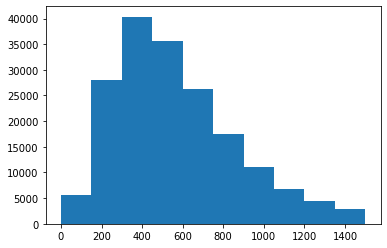

In [43]:
pl.hist(trips["duration"], range=[0, 1500])

We can also use DataFrame built-in functions:

In [44]:
trips.sort_values("duration")

,started_at,ended_at,duration,start_station_id,start_station_name,start_station_description,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_description,end_station_latitude,end_station_longitude
54120,2021-09-09 06:29:40.293000+00:00,2021-09-09 06:30:42.103000+00:00,61,381,Grønlands torg,ved Tøyenbekken,59.912520,10.762240,381,Grønlands torg,ved Tøyenbekken,59.912520,10.762240
150033,2021-09-23 16:57:04.305000+00:00,2021-09-23 16:58:05.488000+00:00,61,421,Alexander Kiellands Plass,langs Maridalsveien,59.928067,10.751203,421,Alexander Kiellands Plass,langs Maridalsveien,59.928067,10.751203
53582,2021-09-09 05:53:12.313000+00:00,2021-09-09 05:54:14.047000+00:00,61,623,7 Juni Plassen,langs Henrik Ibsens gate,59.915060,10.731272,623,7 Juni Plassen,langs Henrik Ibsens gate,59.915060,10.731272
70038,2021-09-11 09:08:26.043000+00:00,2021-09-11 09:09:27.337000+00:00,61,2304,Hedmarksgata,ved Jordal Amfi,59.911784,10.783884,2304,Hedmarksgata,ved Jordal Amfi,59.911784,10.783884
54483,2021-09-09 06:53:24.342000+00:00,2021-09-09 06:54:25.653000+00:00,61,474,Blindern studentparkering,rett ved Blindern Studenterhjem,59.940874,10.720779,474,Blindern studentparkering,rett ved Blindern Studenterhjem,59.940874,10.720779
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52827,2021-09-08 21:45:08.196000+00:00,2021-09-09 05:06:05.736000+00:00,26457,1755,Aker Brygge,ved trikkestopp,59.911184,10.730035,1755,Aker Brygge,ved trikkestopp,59.911184,10.730035
92728,2021-09-14 22:37:30.359000+00:00,2021-09-15 06:03:14.857000+00:00,26744,525,Myraløkka Øst,ved Bentsenbrua,59.937205,10.760581,597,Fredensborg,ved rundkjøringen,59.920995,10.750358
94955,2021-09-15 07:51:00.736000+00:00,2021-09-15 15:25:43.368000+00:00,27282,468,Skillebekk,langs Drammensveien,59.912793,10.710103,390,Saga Kino,langs Olav Vs gate,59.914240,10.732771
8884,2021-09-02 07:15:39.199000+00:00,2021-09-02 15:05:55.621000+00:00,28216,615,Munkedamsveien,ved Haakon VIIs gate,59.913523,10.730106,580,Georg Morgenstiernes hus,ved Moltke Moes vei,59.939026,10.723003


In [46]:
trips["start_station_latitude"]

0         59.923774
1         59.923703
2         59.925611
3         59.925471
4         59.921206
            ...    
190000    59.929542
190001    59.915418
190002    59.929545
190003    59.909006
190004    59.917866
Name: start_station_latitude, Length: 190005, dtype: float64

# Exercise
1. Make a scatter-plot showing the position (longitude, latitude) of stations in Oslo. It is OK to plot a station several times. Use matplotlib or the built-in DataFrame.plot.scatter

2. (Bonus) Make a scatter-plot with different size of the cirles, and let the size be dependent on how popular a station is (i.e. how many trips were started at the given station)






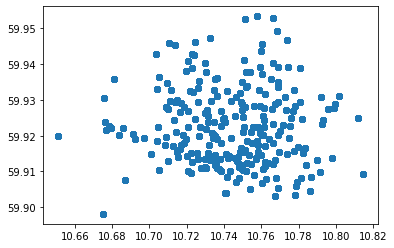

In [47]:
pl.scatter(trips["start_station_longitude"], trips["start_station_latitude"])
pl.show()

Let's see if we can find information about how popular the different start stations are

In [48]:
trips["start_station_id"]

0         620
1         422
2         424
3         446
4         514
         ... 
190000    415
190001    460
190002    399
190003    465
190004    412
Name: start_station_id, Length: 190005, dtype: int64

Let's first try the numpy-way:

In [49]:
stations = pl.unique(trips["start_station_id"])

In [50]:
stations

array([ 377,  378,  380,  381,  382,  383,  384,  385,  387,  388,  389,
        390,  391,  392,  393,  394,  396,  397,  398,  399,  400,  401,
        402,  403,  404,  405,  406,  407,  408,  409,  410,  411,  412,
        413,  414,  415,  416,  417,  418,  420,  421,  422,  423,  424,
        425,  426,  427,  428,  429,  430,  431,  432,  433,  434,  435,
        436,  437,  438,  439,  440,  441,  442,  443,  444,  445,  446,
        447,  448,  449,  450,  451,  452,  453,  454,  455,  456,  457,
        458,  459,  460,  461,  462,  463,  464,  465,  466,  468,  469,
        470,  471,  472,  473,  474,  475,  476,  477,  478,  479,  480,
        481,  482,  483,  484,  486,  487,  488,  489,  491,  493,  494,
        495,  496,  497,  498,  499,  500,  501,  502,  503,  505,  506,
        507,  508,  509,  511,  512,  513,  514,  516,  518,  519,  521,
        522,  523,  524,  525,  526,  527,  529,  530,  531,  532,  533,
        534,  535,  536,  537,  540,  541,  542,  5

In [51]:
stations[0] == trips[
    "start_station_id"
]  # find out if trips started at the given station

0         False
1         False
2         False
3         False
4         False
          ...  
190000    False
190001    False
190002    False
190003    False
190004    False
Name: start_station_id, Length: 190005, dtype: bool

In [52]:
(
    stations[0] == trips["start_station_id"]
).sum()  # sum all trips that started at the given station

680

Now we generalize the line above to create a list of number of trips for each station

In [53]:
number_of_trips = [
    (stations[i] == trips["start_station_id"]).sum() for i in range(len(stations))
]

In [54]:
number_of_trips

[680,
 562,
 1097,
 927,
 603,
 1115,
 1745,
 1450,
 585,
 628,
 400,
 1134,
 1431,
 606,
 822,
 994,
 1391,
 1592,
 2308,
 777,
 981,
 490,
 889,
 818,
 772,
 365,
 855,
 1020,
 2189,
 573,
 1004,
 724,
 1217,
 1548,
 684,
 316,
 578,
 674,
 427,
 950,
 2831,
 690,
 1278,
 1411,
 430,
 1050,
 597,
 285,
 376,
 629,
 813,
 417,
 613,
 855,
 814,
 838,
 936,
 1340,
 823,
 1355,
 217,
 1188,
 1495,
 1739,
 200,
 2038,
 1386,
 622,
 515,
 908,
 585,
 659,
 666,
 96,
 743,
 665,
 675,
 836,
 536,
 1572,
 369,
 1045,
 788,
 1606,
 1082,
 281,
 964,
 658,
 582,
 324,
 512,
 567,
 578,
 590,
 993,
 644,
 1632,
 1344,
 1947,
 454,
 243,
 548,
 765,
 588,
 784,
 703,
 1717,
 461,
 1437,
 677,
 671,
 755,
 565,
 211,
 1532,
 728,
 433,
 1046,
 1213,
 565,
 599,
 1257,
 380,
 313,
 1053,
 914,
 332,
 881,
 442,
 568,
 1086,
 1320,
 533,
 466,
 337,
 814,
 896,
 479,
 428,
 794,
 302,
 269,
 350,
 556,
 790,
 282,
 1179,
 769,
 377,
 848,
 582,
 323,
 418,
 508,
 904,
 197,
 2199,
 478,
 850,
 477

Now let's try some pandas:
For the only purpose of counting trips per station we may use .value_counts()

In [55]:
number_of_trips_pandas = trips["start_station_id"].value_counts()

In [56]:
number_of_trips_pandas

421     2831
398     2308
551     2199
408     2189
607     2132
        ... 
454       96
1919      88
591       81
560       74
573       67
Name: start_station_id, Length: 253, dtype: int64

Now let's say in our case we want all the information we can get about the start station, not only the number of trips. To group the data by start_station_id and count, while still extracting other relevant data for the start station we can use groupby()

In [57]:
station_data = trips.groupby(
    [
        "start_station_id",
        "start_station_name",
        "start_station_description",
        "start_station_latitude",
        "start_station_longitude",
    ]
).count()
station_data

,,,,,started_at,ended_at,duration,end_station_id,end_station_name,end_station_description,end_station_latitude,end_station_longitude
start_station_id,start_station_name,start_station_description,start_station_latitude,start_station_longitude,,,,,,,,
377,Tøyenparken,ved Caltexløkka,59.915667,10.777566,680,680,680,680,680,680,680,680
378,Colosseum Kino,langs Fridtjof Nansens vei,59.929843,10.711285,562,562,562,562,562,562,562,562
380,Bentsebrugata,rett over busstoppet,59.939230,10.759170,1097,1097,1097,1097,1097,1097,1097,1097
381,Grønlands torg,ved Tøyenbekken,59.912520,10.762240,927,927,927,927,927,927,927,927
382,Stensgata,ved trikkestoppet,59.929586,10.732839,603,603,603,603,603,603,603,603
...,...,...,...,...,...,...,...,...,...,...,...,...
2306,Økern Portal,ved Dag Hammarskjölds vei,59.930972,10.801830,170,170,170,170,170,170,170,170
2307,Domus Athletica,ved Vestgrensa Studentby,59.946219,10.724626,604,604,604,604,604,604,604,604
2308,Gunerius,motsatt side av Torggata fra Gunerius bygget,59.914638,10.753428,342,342,342,342,342,342,342,342


In [58]:
station_data = station_data.reset_index()
station_data

,start_station_id,start_station_name,start_station_description,start_station_latitude,start_station_longitude,started_at,ended_at,duration,end_station_id,end_station_name,end_station_description,end_station_latitude,end_station_longitude
0,377,Tøyenparken,ved Caltexløkka,59.915667,10.777566,680,680,680,680,680,680,680,680
1,378,Colosseum Kino,langs Fridtjof Nansens vei,59.929843,10.711285,562,562,562,562,562,562,562,562
2,380,Bentsebrugata,rett over busstoppet,59.939230,10.759170,1097,1097,1097,1097,1097,1097,1097,1097
3,381,Grønlands torg,ved Tøyenbekken,59.912520,10.762240,927,927,927,927,927,927,927,927
4,382,Stensgata,ved trikkestoppet,59.929586,10.732839,603,603,603,603,603,603,603,603
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,2306,Økern Portal,ved Dag Hammarskjölds vei,59.930972,10.801830,170,170,170,170,170,170,170,170
250,2307,Domus Athletica,ved Vestgrensa Studentby,59.946219,10.724626,604,604,604,604,604,604,604,604
251,2308,Gunerius,motsatt side av Torggata fra Gunerius bygget,59.914638,10.753428,342,342,342,342,342,342,342,342
252,2309,Ulven Torg,ved ulvenveien,59.924960,10.812061,214,214,214,214,214,214,214,214


In [59]:
station_data = station_data.drop(columns=station_data.columns[-7:])
station_data

,start_station_id,start_station_name,start_station_description,start_station_latitude,start_station_longitude,started_at
0,377,Tøyenparken,ved Caltexløkka,59.915667,10.777566,680
1,378,Colosseum Kino,langs Fridtjof Nansens vei,59.929843,10.711285,562
2,380,Bentsebrugata,rett over busstoppet,59.939230,10.759170,1097
3,381,Grønlands torg,ved Tøyenbekken,59.912520,10.762240,927
4,382,Stensgata,ved trikkestoppet,59.929586,10.732839,603
...,...,...,...,...,...,...
249,2306,Økern Portal,ved Dag Hammarskjölds vei,59.930972,10.801830,170
250,2307,Domus Athletica,ved Vestgrensa Studentby,59.946219,10.724626,604
251,2308,Gunerius,motsatt side av Torggata fra Gunerius bygget,59.914638,10.753428,342
252,2309,Ulven Torg,ved ulvenveien,59.924960,10.812061,214


In [60]:
station_data = station_data.rename(columns={"started_at": "started_trips"})
station_data = station_data.set_index("start_station_id")
station_data

,start_station_name,start_station_description,start_station_latitude,start_station_longitude,started_trips
start_station_id,,,,,
377,Tøyenparken,ved Caltexløkka,59.915667,10.777566,680
378,Colosseum Kino,langs Fridtjof Nansens vei,59.929843,10.711285,562
380,Bentsebrugata,rett over busstoppet,59.939230,10.759170,1097
381,Grønlands torg,ved Tøyenbekken,59.912520,10.762240,927
382,Stensgata,ved trikkestoppet,59.929586,10.732839,603
...,...,...,...,...,...
2306,Økern Portal,ved Dag Hammarskjölds vei,59.930972,10.801830,170
2307,Domus Athletica,ved Vestgrensa Studentby,59.946219,10.724626,604
2308,Gunerius,motsatt side av Torggata fra Gunerius bygget,59.914638,10.753428,342


In [61]:
station_data.sort_values("started_trips", ascending=False)

,start_station_name,start_station_description,start_station_latitude,start_station_longitude,started_trips
start_station_id,,,,,
421,Alexander Kiellands Plass,langs Maridalsveien,59.928067,10.751203,2831
398,Ringnes Park,ved Sannergata,59.928434,10.759430,2308
551,Olaf Ryes plass,langs Sofienberggata,59.922425,10.758182,2198
408,Tøyen skole,forsiden av skolebygget,59.914943,10.773977,2189
607,Marcus Thranes gate,ved Akerselva,59.932772,10.758595,2132
...,...,...,...,...,...
454,Furulund,langs Vækerøveien,59.919810,10.651118,96
1919,Kværnerveien,Ved Kværnerveien 5,59.905911,10.778592,88
591,Grenseveien,ved Togbru,59.924645,10.781727,81


In [62]:
ended_trips = trips["end_station_id"].value_counts()
ended_trips

421     2818
551     2702
443     2676
489     2644
480     2479
        ... 
591       80
1919      71
498       60
560       51
601       43
Name: end_station_id, Length: 253, dtype: int64

In [63]:
station_data["ended_trips"] = ended_trips
station_data.sort_values("started_trips", ascending=False)

,start_station_name,start_station_description,start_station_latitude,start_station_longitude,started_trips,ended_trips
start_station_id,,,,,,
421,Alexander Kiellands Plass,langs Maridalsveien,59.928067,10.751203,2831,2818
398,Ringnes Park,ved Sannergata,59.928434,10.759430,2308,2308
551,Olaf Ryes plass,langs Sofienberggata,59.922425,10.758182,2198,2702
408,Tøyen skole,forsiden av skolebygget,59.914943,10.773977,2189,2183
607,Marcus Thranes gate,ved Akerselva,59.932772,10.758595,2132,1607
...,...,...,...,...,...,...
454,Furulund,langs Vækerøveien,59.919810,10.651118,96,85
1919,Kværnerveien,Ved Kværnerveien 5,59.905911,10.778592,88,71
591,Grenseveien,ved Togbru,59.924645,10.781727,81,80


# Plotting on a map with ipyleaflet and HTML

We saw that the scatterplot could be used to plot stations on a map:

<AxesSubplot:xlabel='start_station_longitude', ylabel='start_station_latitude'>

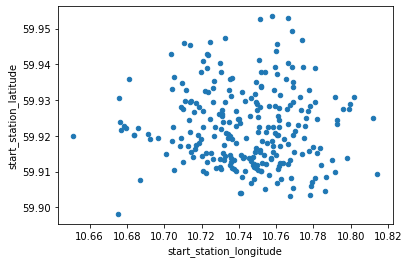

In [64]:
station_data.plot.scatter("start_station_longitude", "start_station_latitude")

We now have tools to plot the most popular bike stations as bigger circles

<AxesSubplot:xlabel='start_station_longitude', ylabel='start_station_latitude'>

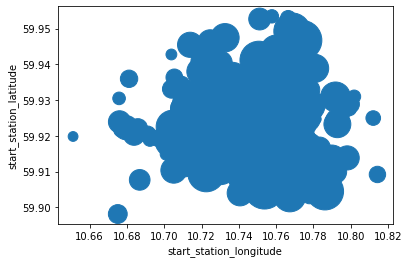

In [65]:
station_data.plot.scatter(
    "start_station_longitude", "start_station_latitude", s="started_trips"
)

### ipywidgets/HTML and ipyleaflet are useful tools to visualize data on maps

In [66]:
from ipyleaflet import Circle, Map, Marker, Polyline, basemap_to_tiles, basemaps
from ipywidgets import HTML

In [67]:
oslo_center = (
    59.9127,
    10.7461,
)  # NB ipyleaflet uses Lat-Long (i.e. y,x, when specifying coordinates)

In [68]:
oslo_map = Map(center=oslo_center, zoom=13)

In [69]:
oslo_map

Map(center=[59.9127, 10.7461], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zo…

In [ ]:
oslo_map.save(
    "data/raw_oslo_map.html"
)  # if interactive view is not possible inline try to open this in your browser

We can add different layers to our map with a marker function. The function is written such that for a given row in the dataframe (i.e. a given station), we add one marker to the map

In [70]:
def add_markers(row):
    center = row["start_station_latitude"], row["start_station_longitude"]
    marker = Circle(
        location=center, radius=int(0.04 * row["started_trips"]), color="green"
    )
    oslo_map.add_layer(marker)

In [71]:
station_data.apply(add_markers, axis=1)

start_station_id
377     None
378     None
380     None
381     None
382     None
        ... 
2306    None
2307    None
2308    None
2309    None
2315    None
Length: 254, dtype: object

# Exercise

Note: If you have issues with installing ipyleaflet or ipywidget with pip, just use pl.scatter() or pl.plot()

1) Create the DataFrame station_data as described in the lecture

2) Make a similar plot of the Oslo map with the most popular end-stations as red circles

3) Add the following line as the last line in your add_markers-function: marker.popup = HTML(f"{row['start_station_name']} Trips started: {row['started_trips']}")  . You can also add newlines within the string with the HTML command for newline

4) Try to make an Oslo map showing both started trips and ended trips in the same map

5) Make a map showing which stations are most popular going from Stensgata

In [74]:
%reset
import pandas as pd
import pylab as pl

trips = pd.read_csv("data/bysykkel/trips-2021.9.1-2021.9.30.csv")
station_data = trips.groupby(
    [
        "start_station_id",
        "start_station_longitude",
        "start_station_latitude",
        "start_station_name",
    ]
).count()
station_data = station_data.reset_index()
station_data = station_data.drop(columns=station_data.columns[-7:])
station_data = station_data.rename(columns={"started_at": "started_trips"})
station_data = station_data.set_index("start_station_id")
station_data["ended_trips"] = trips["end_station_id"].value_counts()

from ipyleaflet import Circle, Map, Marker, Polyline, basemap_to_tiles, basemaps
from ipywidgets import HTML

oslo_center = (
    59.9127,
    10.7461,
)  # NB ipyleaflet uses Lat-Long (i.e. y,x, when specifying coordinates)
oslo_map = Map(center=oslo_center, zoom=13)


def add_markers(row):
    center = row["start_station_latitude"], row["start_station_longitude"]
    marker = Circle(
        location=center, radius=int(0.04 * row["started_trips"]), color="green"
    )
    marker2 = Circle(
        location=center, radius=int(0.04 * row["ended_trips"]), color="red"
    )
    oslo_map.add_layer(marker)
    oslo_map.add_layer(marker2)
    marker.popup = HTML(
        f"{row['start_station_name']} <br> Trips started: {row['started_trips']}"
    )


station_data.apply(add_markers, axis=1)

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


start_station_id
377     None
378     None
380     None
381     None
382     None
        ... 
2306    None
2307    None
2308    None
2309    None
2315    None
Length: 254, dtype: object

In [75]:
oslo_map

Map(center=[59.9127, 10.7461], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zo…